# Introduction to Data Visualization in Python

<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Tutorials/blob/master/Introduction%20to%20Data%20Visualization%20in%C2%A0Python/Introduction%20to%20Data%20Visualization%20in%C2%A0Python.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Tutorials/blob/master/Introduction%20to%20Data%20Visualization%20in%C2%A0Python/Introduction%20to%20Data%20Visualization%20in%C2%A0Python.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

## Downloads datasets from Kaggle

In [ ]:
# Install Kaggle API
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 4.2MB/s 
     |████████████████████████████████| 4.2MB 16.5MB/s 
     |████████████████████████████████| 112kB 59.9MB/s 
     |████████████████████████████████| 143kB 46.6MB/s 
     |████████████████████████████████| 51kB 3.6MB/s 
  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-chb0zonk/lxml/setup.py'"'"'; __file__='"'"'/tmp/pip-install-chb0zonk/lxml/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-8gh1brx7/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [ ]:
# only for google colab
import os
os.environ['KAGGLE_USERNAME'] = "<username>" 
os.environ['KAGGLE_KEY'] = "<key>"

In [ ]:
!kaggle datasets download -d uciml/iris --unzip

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 2.22MB/s]


In [ ]:
!kaggle datasets download -d zynicide/wine-reviews --unzip

 81% 41.0M/50.9M [00:01<00:00, 22.3MB/s]
100% 50.9M/50.9M [00:01<00:00, 43.8MB/s]


## Import Datasets

We are going to use two datasets in this tutorial. The [Iris](https://archive.ics.uci.edu/ml/datasets/iris) and the [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews) dataset.

In [ ]:
%matplotlib inline  
import pandas as pd
import numpy as np

In [ ]:
iris = pd.read_csv('Iris.csv', header=0, index_col=0, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']).reset_index(drop=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
wine_reviews = pd.read_csv('winemag-data-130k-v2.csv', index_col=0)
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Matplotlib

Matplotlib is a Python plotting libary.

In [ ]:
import matplotlib.pyplot as plt

### Scatter plot

Text(0, 0.5, 'sepal_width')

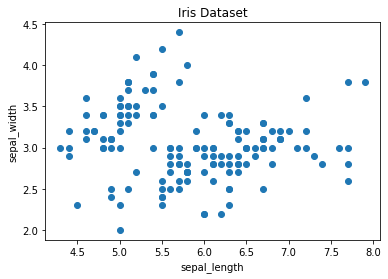

In [ ]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(iris['sepal_length'], iris['sepal_width'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

We can color each point by class

Text(0, 0.5, 'sepal_width')

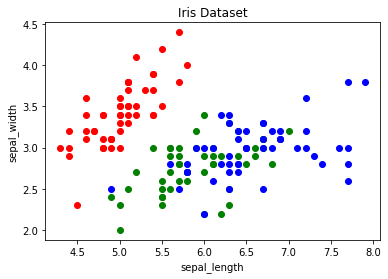

In [ ]:
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
fig, ax = plt.subplots()
for i in range(len(iris['sepal_length'])):
    ax.scatter(iris['sepal_length'][i], iris['sepal_width'][i],color=colors[iris['class'][i]])
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

### Line Chart

In [ ]:
iris.shape[0]

150

No handles with labels found to put in legend.


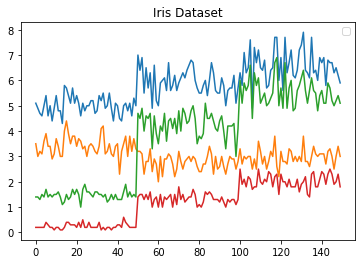

In [ ]:
columns = iris.columns.drop(['class'])
x_data = range(0, iris.shape[0])
fig, ax = plt.subplots()
for column in columns:
    ax.plot(x_data, iris[column])
ax.set_title('Iris Dataset')
ax.legend()

### Histogram

Text(0, 0.5, 'Frequency')

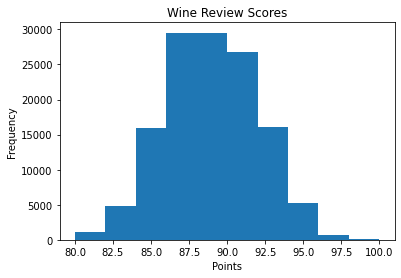

In [ ]:
fig, ax = plt.subplots()
ax.hist(wine_reviews['points'])
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

### Bar Chart

Text(0, 0.5, 'Frequency')

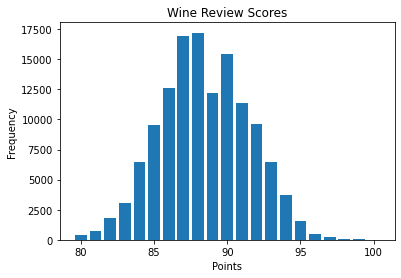

In [ ]:
fig, ax = plt.subplots()
data = wine_reviews['points'].value_counts()
points = data.index
frequency = data.values
ax.bar(points, frequency)
ax.set_title('Wine Review Scores')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

## Pandas Visualization

Pandas uses Matplotlib and makes it easy to plot Data

### Scatter Plot

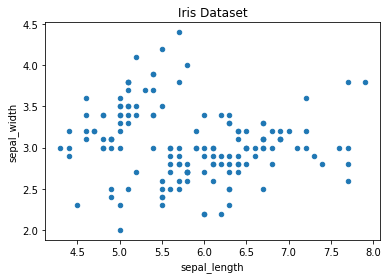

In [ ]:
iris.plot.scatter(x='sepal_length', y='sepal_width', title='Iris Dataset')

### Line Chart

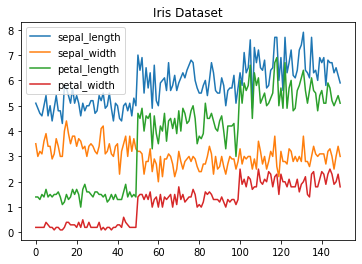

In [ ]:
iris.drop(['class'], axis=1).plot.line(title='Iris Dataset')

### Histogram

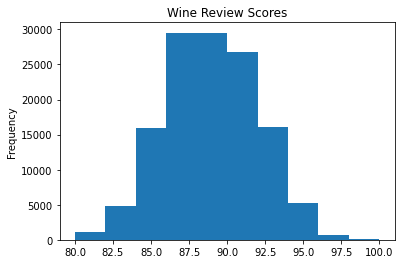

In [ ]:
wine_reviews['points'].plot.hist(title='Wine Review Scores')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7afcf5790>,
      dtype=object)

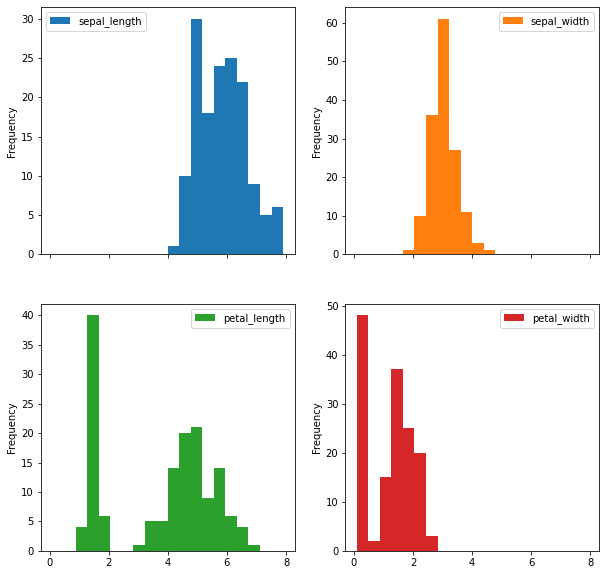

In [ ]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)

### Bar Chart

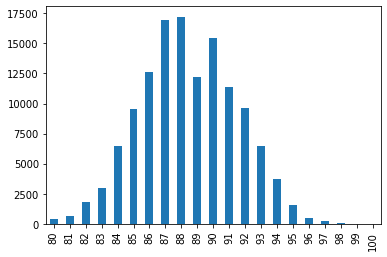

In [ ]:
wine_reviews['points'].value_counts().sort_index().plot.bar()

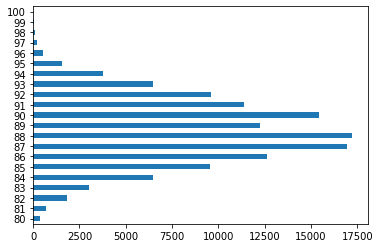

In [ ]:
wine_reviews['points'].value_counts().sort_index().plot.barh()

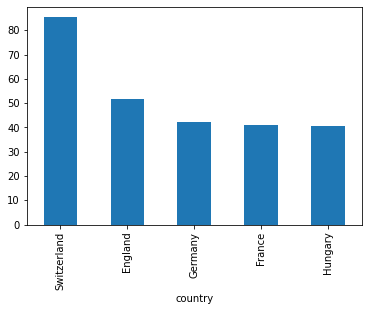

In [ ]:
wine_reviews.groupby("country").price.mean().sort_values(ascending=False)[:5].plot.bar()

## Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

### Scatter plot

In [ ]:
import seaborn as sns
sns.__version__

'0.11.1'

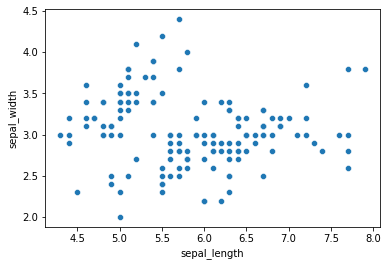

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

Highlighting the classes is significally easier than using Matplotlib. We only need to specify the hue parameter.

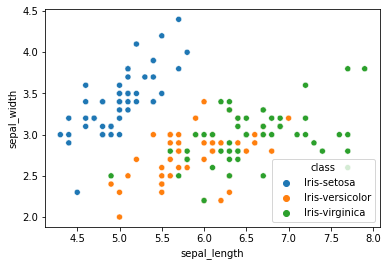

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)

### Line chart

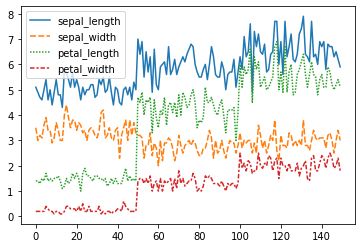

In [ ]:
sns.lineplot(data=iris.drop(['class'], axis=1))

### Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


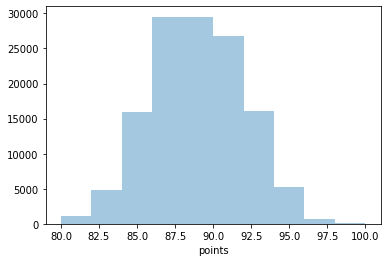

In [ ]:
sns.distplot(wine_reviews['points'], bins=10, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


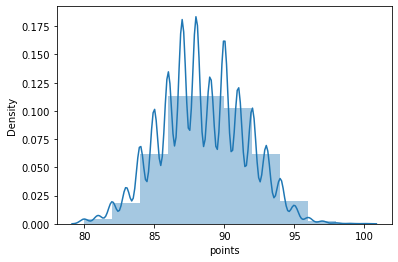

In [ ]:
sns.distplot(wine_reviews['points'], bins=10, kde=True)

### Bar chart

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


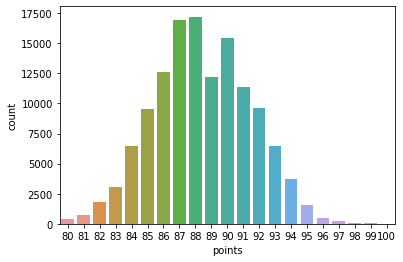

In [ ]:
sns.countplot(wine_reviews['points'])

## More advanced graphs 

Now that you have a basic understanding about the syntax of Matplotlib, Pandas Visualization and Seaborn I want to show you a few other graph types useful for data science and machine learning. For most of them Seaborn is the go to library because you can use it to make complicated graphs with almost no lines of code.

### Box Plots

Box Plots are useful to show distributions with respect to categories.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


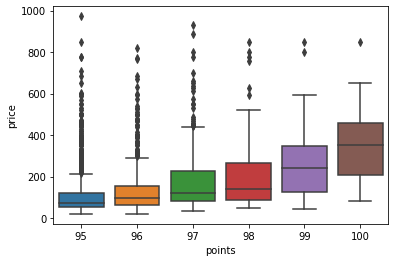

In [ ]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot('points', 'price', data=df)

## Pie Plots

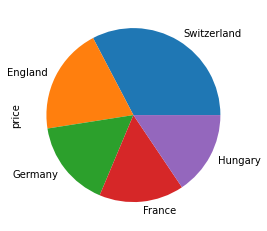

In [ ]:
wine_reviews.groupby("country").price.mean().sort_values(ascending=False)[:5].plot.pie()

### Heatmap

Heatmaps are perfect for exploring the correlation of the features

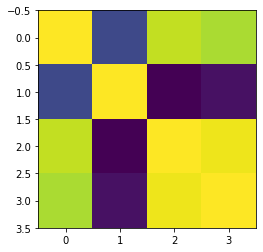

In [ ]:
corr = iris.corr()
fig, ax = plt.subplots()
im = ax.imshow(corr.values)

[None, None, None, None, None, None, None, None]

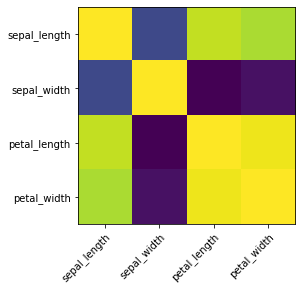

In [ ]:
# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

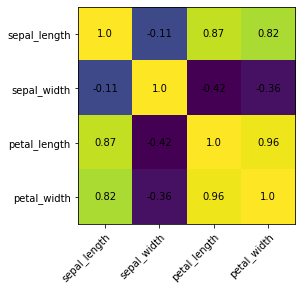

In [ ]:
# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

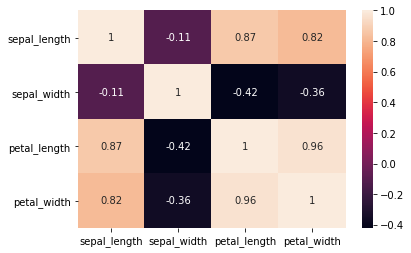

In [ ]:
sns.heatmap(iris.corr(), annot=True)

We can make plots bigger by using the figsize parameter from matplotlib. To use it with Seaborn we need to pass the seaborn function we are using the matplotlib axis as an argument.

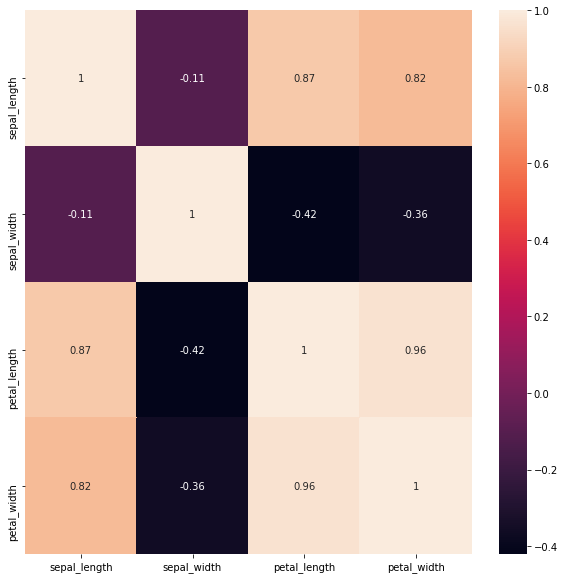

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(iris.corr(), annot=True, ax=ax)

## Faceting

Faceting is the act of breaking data variables up across multiple subplots, and combining those subplots into a single figure.

### FacetGrid

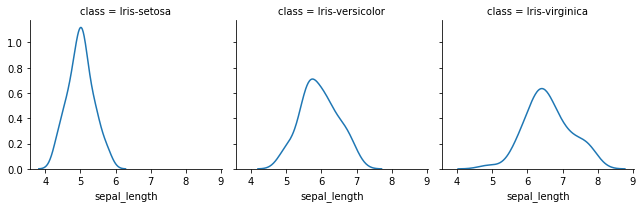

In [ ]:
g = sns.FacetGrid(iris, col='class')
g = g.map(sns.kdeplot, 'sepal_length')

### Pairplot

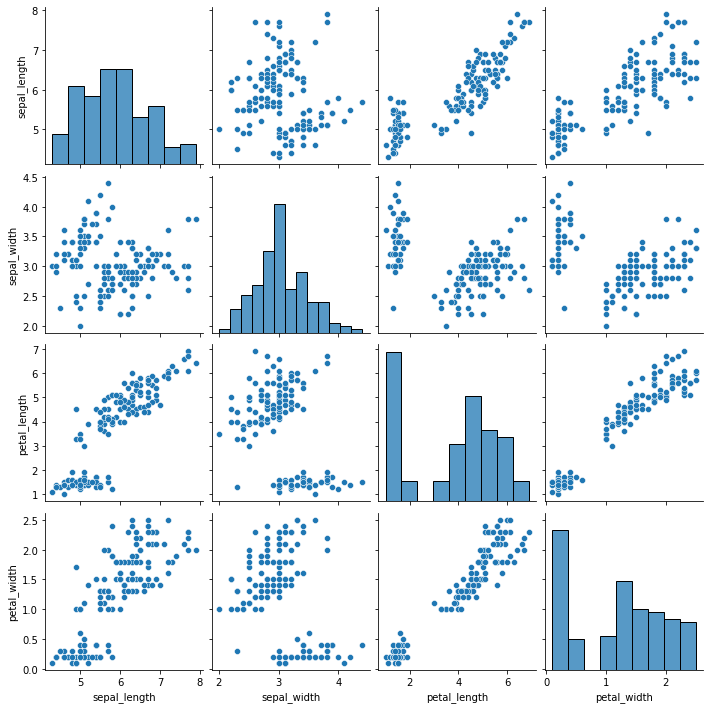

In [ ]:
sns.pairplot(iris)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


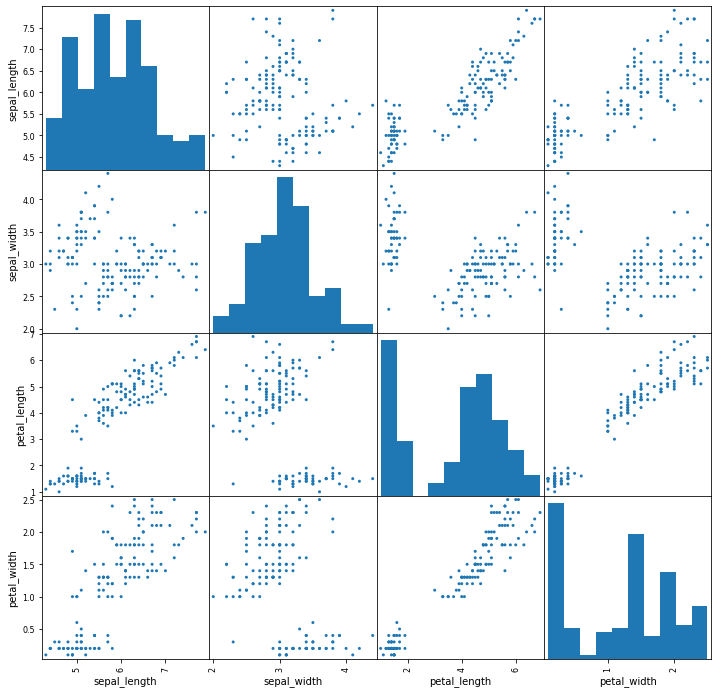

In [ ]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(iris, alpha=1, ax=ax);

That's all from this tutorial I hope you got an intuition about some tools you can use for visualizing data. If you like it consider subscribing on [Youtube](https://www.youtube.com/channel/UCBOKpYBjPe2kD8FSvGRhJwA). If you want to see a full series on any of the tools used in this tutorial leave a comment underneath one of my Videos or dm me on [Twitter](https://twitter.com/Tanner__Gilbert)